In [1]:
import numpy as np 
import cmath 

from qiskit import QuantumCircuit, transpile
from qiskit import Aer, execute
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram

from project_qsiris.conversion_qo_qiskit import odyssey_to_qiskit,load_oddysey_puzzle

vec: [1.0, 0.0]
vec: [0.0, 1.0]
vec: [0.0, 1.0]
vec: [1.0, 0.0]
vec: [0.0, -1j]
vec: [1j, 0.0]
vec: [1.0, 0.0]
vec: [0.0, -1.0]
vec: [1.0, 0.0]
vec: [0.0, 1.0]
vec: [0.0, 0.0]
vec: [0.0, 1.0]
vec: [0.7071067811865475, 0.7071067811865475]
vec: [0.7071067811865475, -0.7071067811865475]


In [2]:
#Enable this line if you plan to use IBM Q Experience and run these circuit on real IBM hw (and see results in IBMQ)
#IBMQ.load_account()

## Templates (with filled examples) :

### Example 001: steps to create a Qiskit circuit out of a QO puzzle (using example_002.qpf)

In [3]:
#Step 1: Read the QO puzzle file (has extension .qpf). 
#If you want to change the puzzle file, simply add the new path or puzzle in path= folder

path = "/Users/voicutu/Documents/GitHub/Qsiris-Quantum-Odyssey-and-Qiskit/circuits/odyssey_circuits/aaa_qo.qpf"
puzzle = load_oddysey_puzzle(path)

In [4]:
puzzle['PuzzleGateSlots'][0]

{'IsGateVisible': False,
 'GateDefinition': {'ID': 0,
  'Name': 'H',
  'Type': 2,
  'IconPath': 'Artwork/GatesIcons/HGate',
  'CompatibleQubits': 1,
  'DefinitionMatrix': [[{'Real': 0.7071067932881648,
     'Imaginary': 0.0,
     'Magnitude': 0.7071067932881648,
     'Phase': 0.0},
    {'Real': 0.7071067932881648,
     'Imaginary': 0.0,
     'Magnitude': 0.7071067932881648,
     'Phase': 0.0}],
   [{'Real': 0.7071067932881648,
     'Imaginary': 0.0,
     'Magnitude': 0.7071067932881648,
     'Phase': 0.0},
    {'Real': -0.7071067932881648,
     'Imaginary': 0.0,
     'Magnitude': 0.7071067932881648,
     'Phase': 3.141592653589793}]]},
 'CircuitPosition': {'Item1': 0, 'Item2': 0},
 'SlaveGatesIDs': [],
 'MasterGateID': 0,
 'OrderInPlacement': 0,
 'ID': 1}

In [5]:
puzzle['PuzzleGateSlots']

[{'IsGateVisible': False,
  'GateDefinition': {'ID': 0,
   'Name': 'H',
   'Type': 2,
   'IconPath': 'Artwork/GatesIcons/HGate',
   'CompatibleQubits': 1,
   'DefinitionMatrix': [[{'Real': 0.7071067932881648,
      'Imaginary': 0.0,
      'Magnitude': 0.7071067932881648,
      'Phase': 0.0},
     {'Real': 0.7071067932881648,
      'Imaginary': 0.0,
      'Magnitude': 0.7071067932881648,
      'Phase': 0.0}],
    [{'Real': 0.7071067932881648,
      'Imaginary': 0.0,
      'Magnitude': 0.7071067932881648,
      'Phase': 0.0},
     {'Real': -0.7071067932881648,
      'Imaginary': 0.0,
      'Magnitude': 0.7071067932881648,
      'Phase': 3.141592653589793}]]},
  'CircuitPosition': {'Item1': 0, 'Item2': 0},
  'SlaveGatesIDs': [],
  'MasterGateID': 0,
  'OrderInPlacement': 0,
  'ID': 1},
 {'IsGateVisible': False,
  'GateDefinition': {'ID': 5,
   'Name': 'I',
   'Type': 0,
   'IconPath': 'Artwork/GatesIcons/IGate',
   'CompatibleQubits': 1,
   'DefinitionMatrix': [[{'Real': 1.0,
      'Imagi

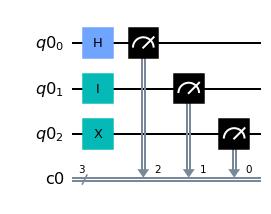

In [6]:
#Step 2: convert your QO puzzle to a Qiskit circuit  and draw the mpl

qc = odyssey_to_qiskit(puzzle, incl_initial_state = False,
                      use_barrier = False,
                      incl_all_measurements = True)
qc.draw('mpl')

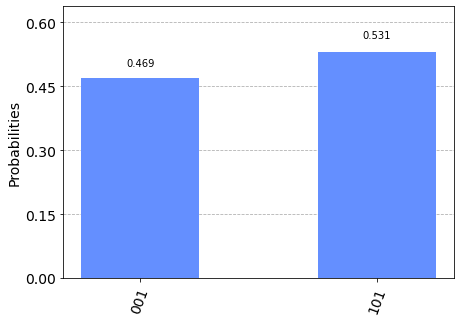

In [7]:
#Step 3: Run your puzzle on a qiskit simulator and plot counts

backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend,shots=1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### Now let's run the circuit on a real IBM device:

In [ ]:
#Step 4: Run your puzzle on a real QPU from IBM. You can customize the execution here.
# It will take some time for the job to be executed

provider = IBMQ.get_provider('ibm-q')
ibm_QPU=provider.get_backend('ibmq_santiago')

job=execute(qc, backend=ibm_QPU, shots=100)
job_monitor(job,interval=10) 

In [ ]:
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

### Another example (similar to previous, different gates):

In [ ]:
path = "circuits/odyssey_circuits/asdasd.qpf"

In [ ]:
res = load_oddysey_puzzle(path)
res.keys()

In [ ]:
puzzle['PuzzleGateSlots'][1]

In [ ]:
a[0][0]

In [ ]:
res['PuzzleGates'][0]

In [ ]:
qc = odyssey_to_qiskit(res, incl_initial_state = False,
                      use_barrier = False,
                      incl_all_measurements = True)

qc.draw('mpl')

In [ ]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend,shots=1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [ ]:
backend = Aer.get_backend('qasm_simulator')
result = transpile(qc, backend=backend, optimization_level=3)
result.draw(output='mpl')

In [ ]:
# This runbook is for testing how much you can approximate decimals if Qiskit is still able to rec as unitary
# It is important to have as many decimals as possible 
# Otherwise we can get unitary errors (even if we can introduce the gate in the circuit) .

unit=[[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j],
      [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j],
      [ 0.+0.j,  0.+0.j,  0.70710679+0.j,  0.70710679+0.j],#np.sqrt(1/2)+0.j,  np.sqrt(1/2)+0.j],
      [ 0.+0.j,  0.+0.j,  0.70710679+0.j, -0.70710679+0.j],]#np.sqrt(1/2)+0.j,  -np.sqrt(1/2)+0.j],]#0.70710679+0.j, -0.70710679+0.j],]


qc=QuantumCircuit(2)
qc.unitary(unit,[0,1])
qc.draw()

In [ ]:
print(qc.qasm())